# **Classifying Mushrooms: A Comparative Analysis of Machine Learning Algorithms**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    precision_recall_curve,
    auc,
)
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings

warnings.simplefilter("ignore")
%matplotlib inline

import os
# Additional libraries for heatmaps and plotting
import seaborn as heatmap_lib
import matplotlib.pyplot as plt



# Import the dataset 

In [4]:
mushroom_data = pd.read_csv("mushrooms.csv")
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushroom_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

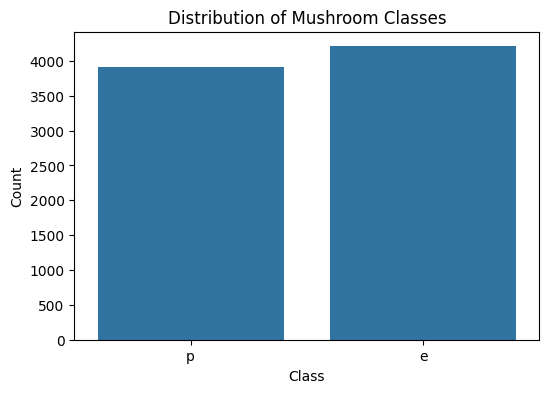

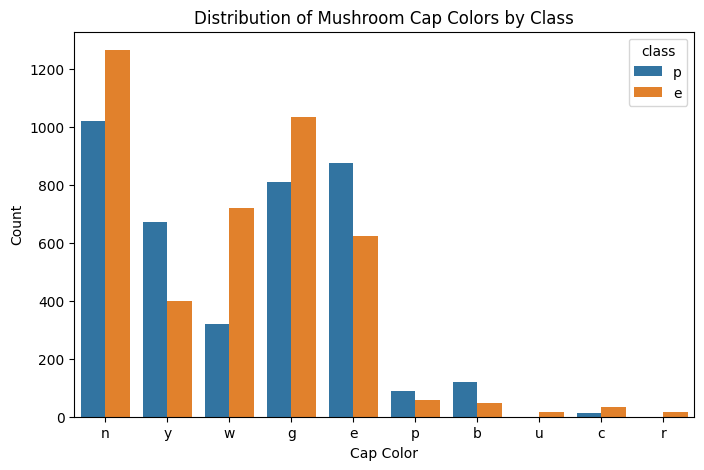

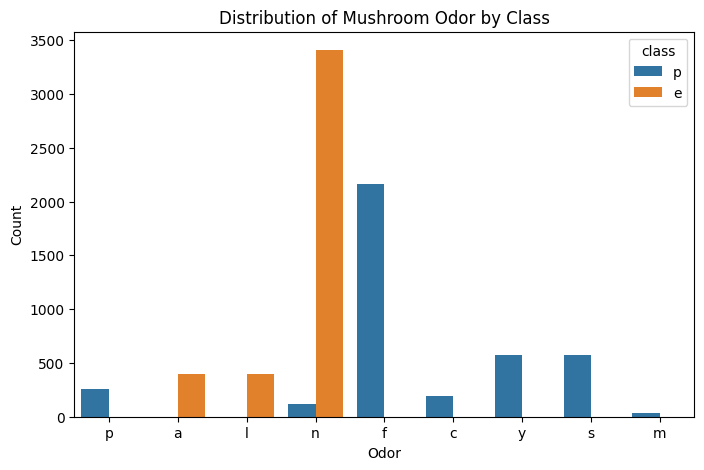

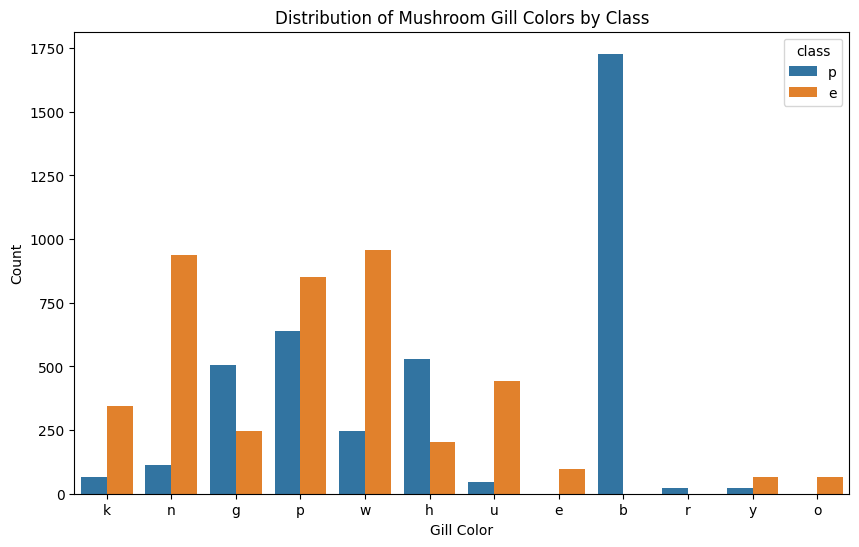

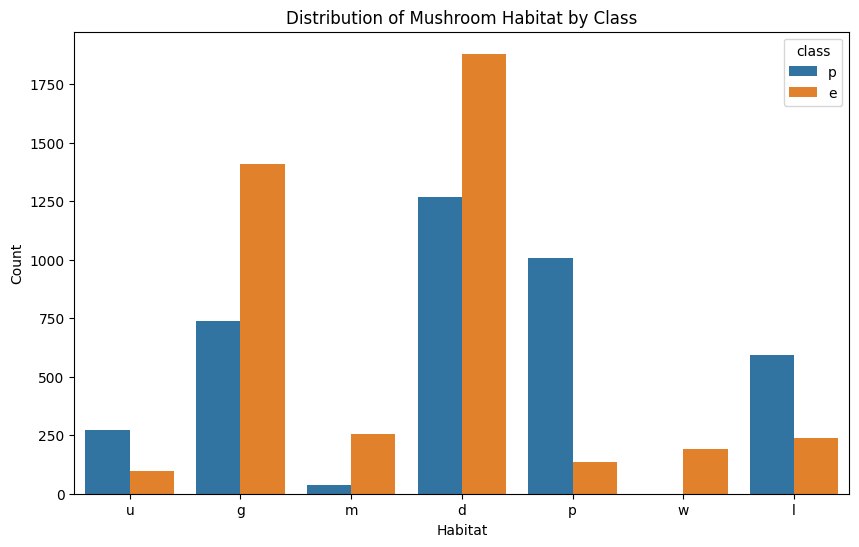

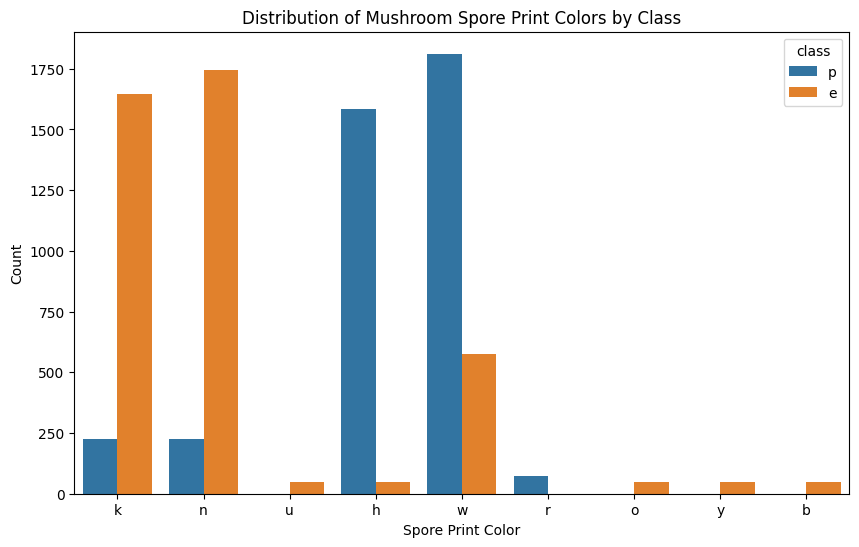

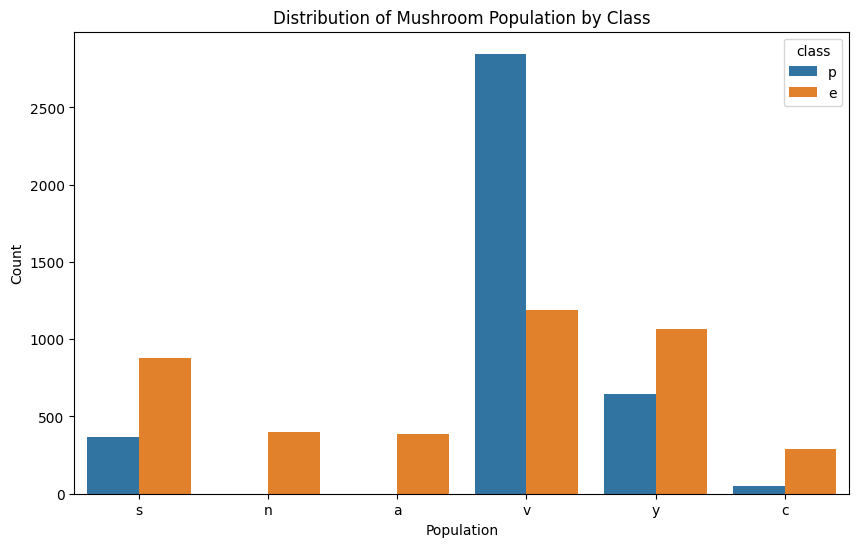

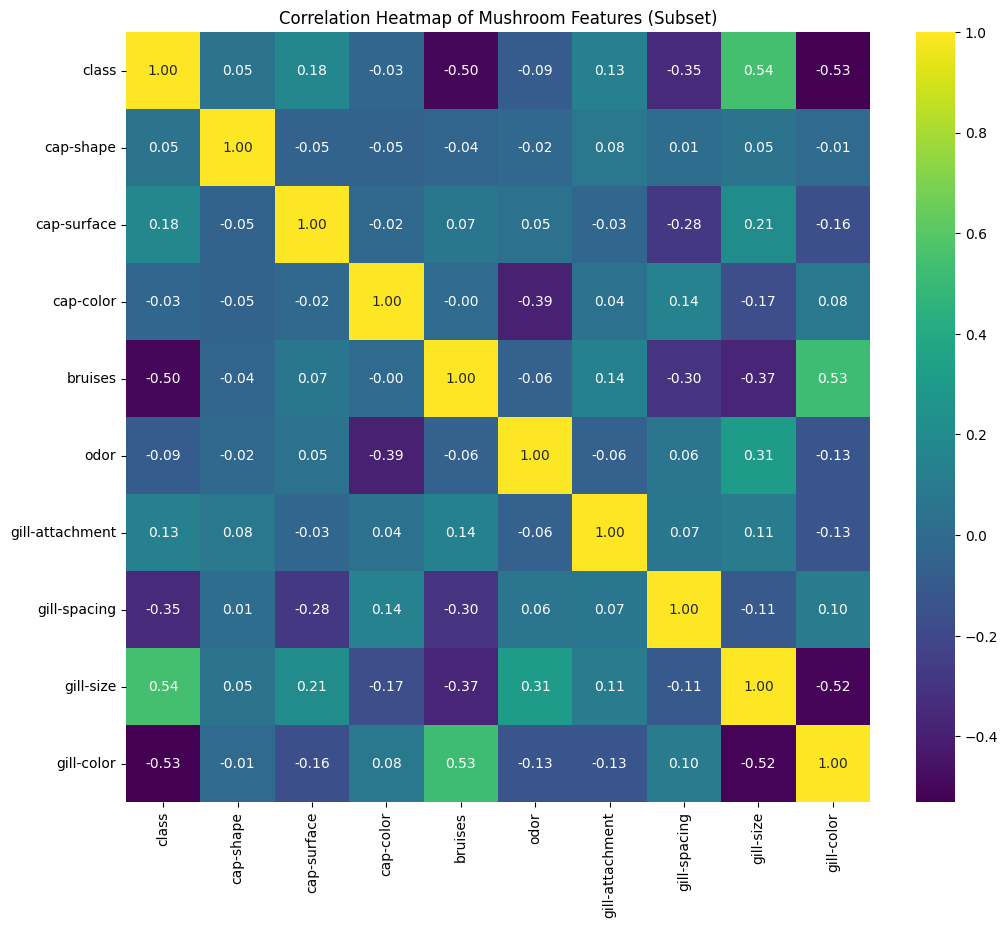

In [7]:
# Load the mushroom dataset
file_path = 'mushrooms.csv'
mushroom_data = pd.read_csv(file_path)

# Plot 1: Distribution of Mushroom Classes
plt.figure(figsize=(6, 4))
sns.countplot(data=mushroom_data, x='class')
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plot 2: Distribution of Mushroom Cap Colors by Class
plt.figure(figsize=(8, 5))
sns.countplot(data=mushroom_data, x='cap-color', hue='class')
plt.title('Distribution of Mushroom Cap Colors by Class')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.show()

# Plot 3: Distribution of Mushroom Odor by Class
plt.figure(figsize=(8, 5))
sns.countplot(data=mushroom_data, x='odor', hue='class')
plt.title('Distribution of Mushroom Odor by Class')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.show()


# Plot 4: Distribution of Mushroom Gill Colors by Class
plt.figure(figsize=(10, 6))
sns.countplot(data=mushroom_data, x='gill-color', hue='class')
plt.title('Distribution of Mushroom Gill Colors by Class')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.show()

# Plot 5: Distribution of Mushroom Habitat by Class
plt.figure(figsize=(10, 6))
sns.countplot(data=mushroom_data, x='habitat', hue='class')
plt.title('Distribution of Mushroom Habitat by Class')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.show()

# Plot 6: Distribution of Mushroom Spore Print Colors by Class
plt.figure(figsize=(10, 6))
sns.countplot(data=mushroom_data, x='spore-print-color', hue='class')
plt.title('Distribution of Mushroom Spore Print Colors by Class')
plt.xlabel('Spore Print Color')
plt.ylabel('Count')
plt.show()

# Plot 7: Distribution of Mushroom Population by Class
plt.figure(figsize=(10, 6))
sns.countplot(data=mushroom_data, x='population', hue='class')
plt.title('Distribution of Mushroom Population by Class')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

# Plot 4: Correlation Heatmap of Mushroom Features (Subset)
# Encoding categorical data to numeric
encoder = LabelEncoder()
mushroom_encoded = mushroom_data.apply(encoder.fit_transform)

# Correlation heatmap for a subset of features
plt.figure(figsize=(12, 10))
sns.heatmap(mushroom_encoded.iloc[:, :10].corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap of Mushroom Features (Subset)')
plt.show()

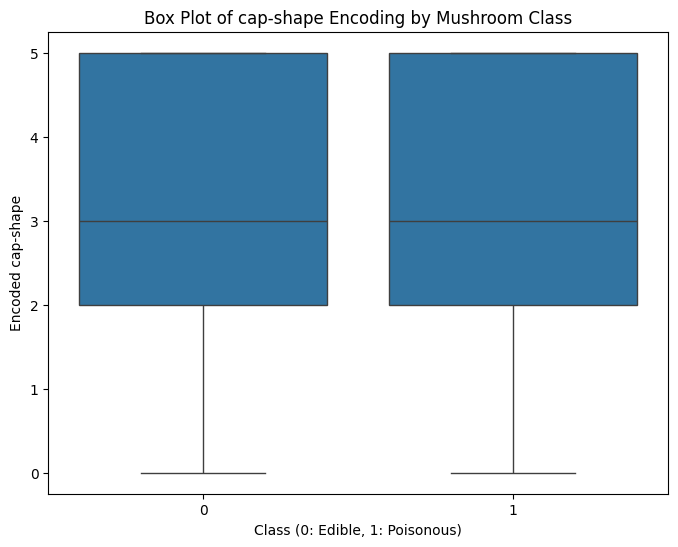

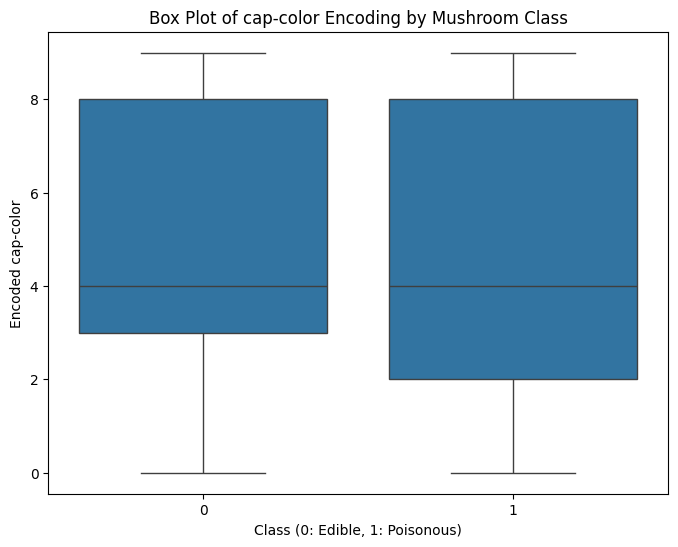

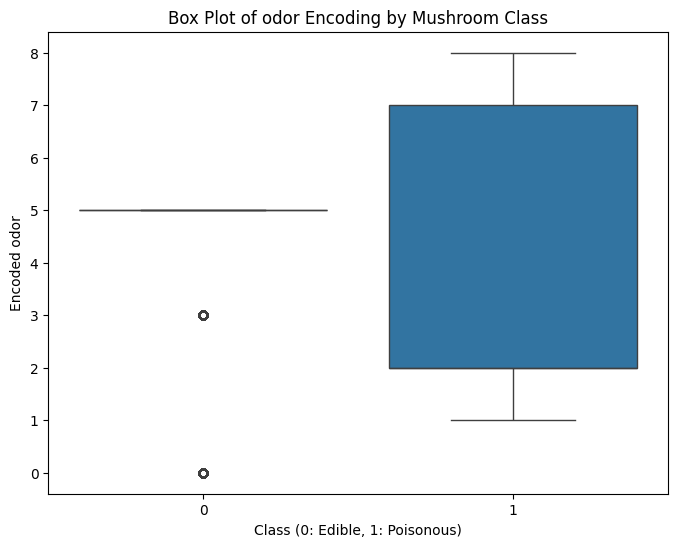

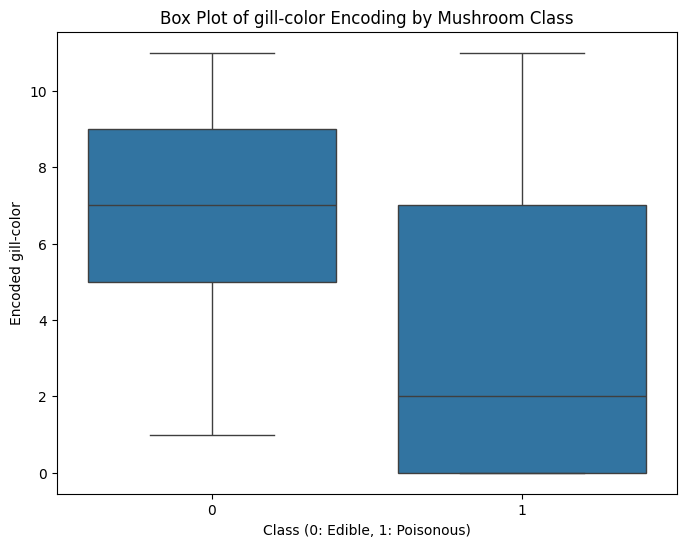

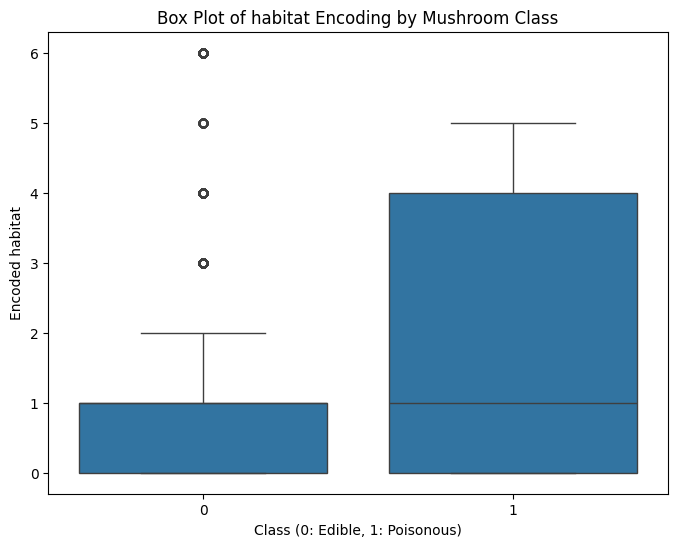

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the mushroom dataset
file_path = 'mushrooms.csv'
mushroom_data = pd.read_csv(file_path)

# Convert categorical features into numerical encodings
encoder = LabelEncoder()
for col in mushroom_data.columns:
    mushroom_data[col] = encoder.fit_transform(mushroom_data[col])

# List of features to create box plots for
features_to_plot = ['cap-shape', 'cap-color', 'odor', 'gill-color', 'habitat']

# Creating box plots for each feature
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='class', y=feature, data=mushroom_data)
    plt.title(f'Box Plot of {feature} Encoding by Mushroom Class')
    plt.xlabel('Class (0: Edible, 1: Poisonous)')
    plt.ylabel(f'Encoded {feature}')
    plt.show()

In [9]:
features = mushroom_data.drop(['class'], axis=1)  
target = mushroom_data["class"]

In [10]:
encoder_features = LabelEncoder()
for col in features.columns:
    features[col] = encoder_features.fit_transform(features[col])
encoder_target = LabelEncoder()
target = encoder_target.fit_transform(target)
features = pd.get_dummies(features, columns=features.columns, drop_first=True)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5, 58.5, 60.5, 62.5, 64.5,
        66.5, 68.5, 70.5, 72.5, 74.5, 76.5, 78.5, 80.5, 82.5, 84.5, 86.5,
        88.5, 90.5, 92.5, 94.5]),
 [Text(0, 0.5, 'cap-shape_1'),
  Text(0, 2.5, 'cap-shape_3'),
  Text(0, 4.5, 'cap-shape_5'),
  Text(0, 6.5, 'cap-surface_2'),
  Text(0, 8.5, 'cap-color_1'),
  Text(0, 10.5, 'cap-color_3'),
  Text(0, 12.5, 'cap-color_5'),
  Text(0, 14.5, 'cap-color_7'),
  Text(0, 16.5, 'cap-color_9'),
  Text(0, 18.5, 'odor_1'),
  Text(0, 20.5, 'odor_3'),
  Text(0, 22.5, 'odor_5'),
  Text(0, 24.5, 'odor_7'),
  Text(0, 26.5, 'gill-attachment_1'),
  Text(0, 28.5, 'gill-size_1'),
  Text(0, 30.5, 'gill-color_2'),
  Text(0, 32.5, 'gill-color_4'),
  Text(0, 34.5, 'gill-color_6'),
  Text(0, 36.5, 'gill-color_8'),
  Text(0, 38.5, 'gill-color_10'),
  Text(0, 40.5, 'stalk-shape_1'),
  Text(

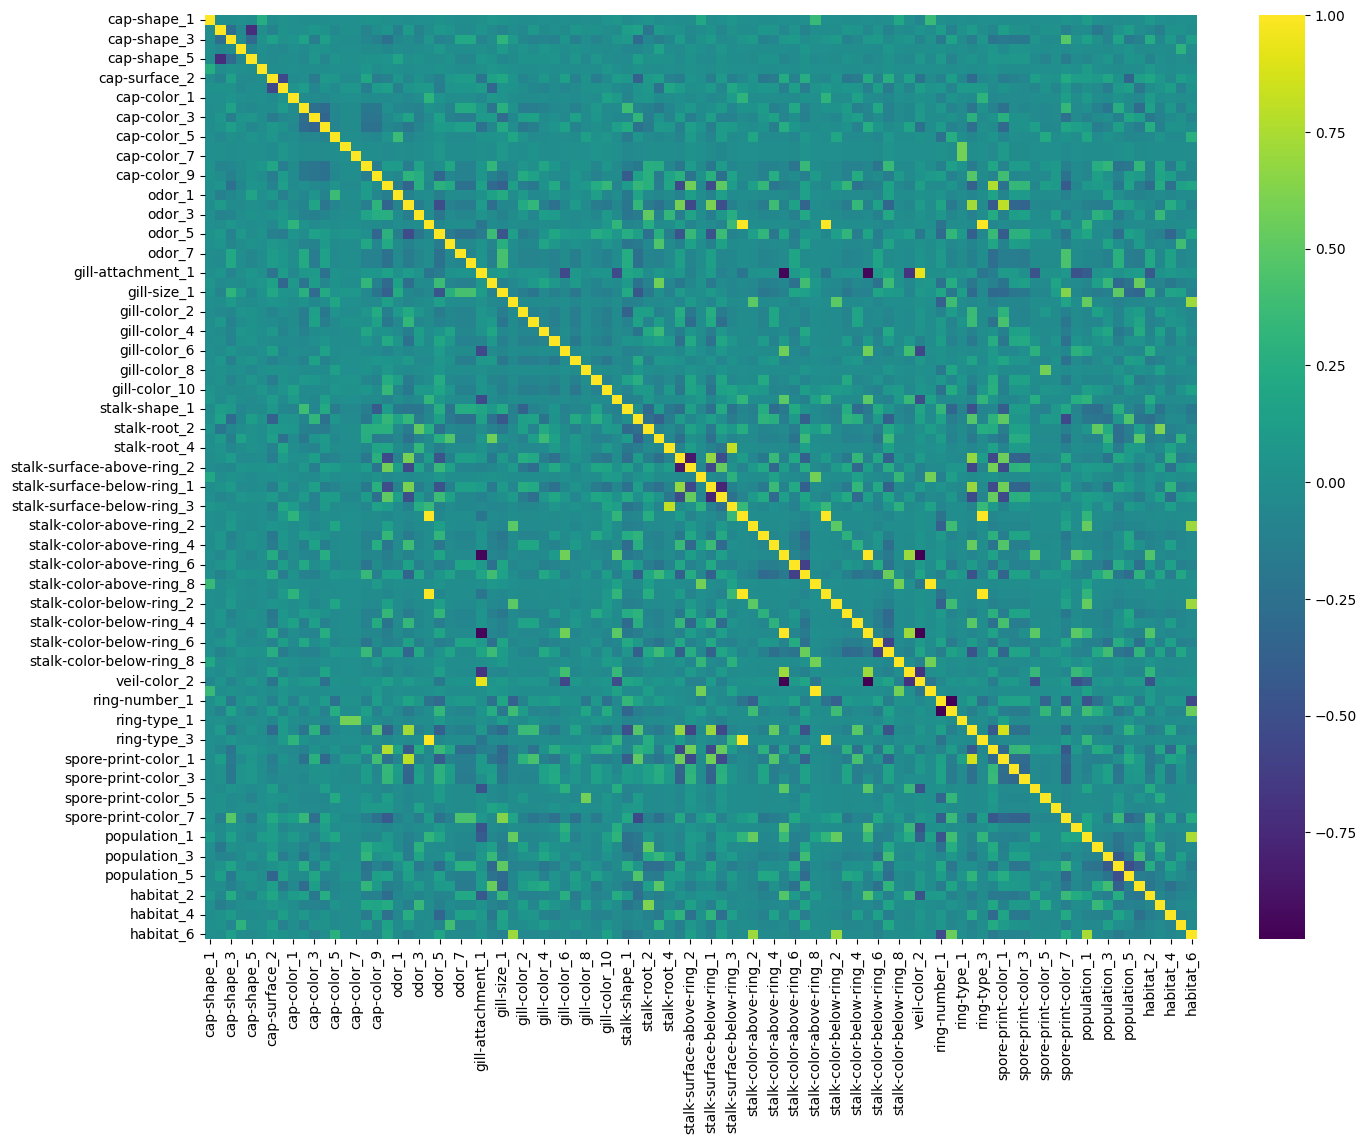

In [11]:
# Plotting correlation
plt.figure(figsize=(16,12))
heatmap_lib.heatmap(features.corr(), linewidths=.0, cmap="viridis")
plt.yticks(rotation=0)


In [12]:
# Splitting dataset
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [13]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)
features_transformed = scaler.fit_transform(features)
features_test_transformed = scaler.transform(features_test)
features_train_transformed, features_test_transformed, target_train, target_test = train_test_split(features_transformed, target, test_size=0.3, random_state=42)


Original shape: (5686, 95)
Shape of PCA data: (5686, 2)


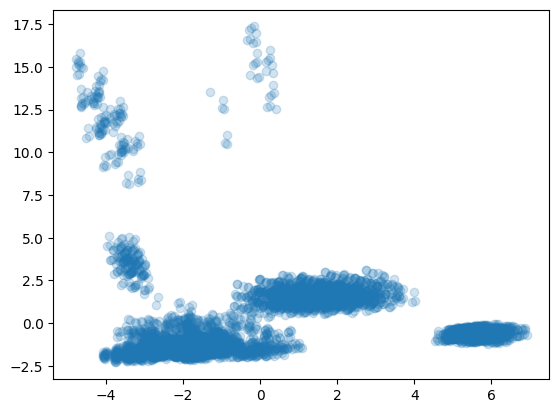

In [14]:
# PCA transformation
from sklearn.decomposition import PCA
pca_transformer = PCA(n_components=2)
train_pca = pca_transformer.fit_transform(features_train_transformed) 
test_pca = pca_transformer.transform(features_test_transformed)
print("Original shape:", features_train_transformed.shape)
print('Shape of PCA data:', train_pca.shape)
plt.scatter(train_pca[:, 0], train_pca[:, 1], alpha=0.2)

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_pca, target_train)
# Remaining code for Logistic Regression...

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dec_tree.fit(train_pca, target_train)
# Remaining code for Decision Tree...

# Support Vector Mach
from sklearn.svm import SVC
svc_model = SVC(random_state=42, gamma="auto", probability=True)
svc_model.fit(train_pca, target_train)
# Remaining code for Support Vector Machine...

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(train_pca, target_train)
# Remaining code for K-Nearest Neighbors...

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(train_pca, target_train)
# Remaining code for Naive Bayes...

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
rf_classifier.fit(train_pca, target_train)
# Train the classifier

#MLP classyfier
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(train_pca, target_train)

MLPClassifier()

In [16]:
models = [
    {'label': 'Logistic Regression', 'model': log_reg},
    {'label': 'Decision Tree', 'model': dec_tree},
    {'label': 'Support Vector Machine', 'model': svc_model},
    {'label': 'K-Nearest Neighbors', 'model': knn_classifier},
    {'label': 'Naïve Bayes', 'model': nb_classifier},
    {'label': 'Random Forest', 'model': rf_classifier},
    {'label': 'MLP Classifier', 'model': mlp_classifier}
]

In [17]:
from sklearn.model_selection import GridSearchCV

def find_best_params(model, param_grid, train_pca, target_train):
    """
    This function takes a model, a parameter grid, and training data,
    and returns the best parameters found using GridSearchCV.
    """
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(train_pca, target_train)
    return grid_search.best_params_

# Define the parameter grids for each model
param_grid_log_reg = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
param_grid_dec_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 50, 100, None]}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
param_grid_knn = {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
param_grid_nb = {}  # Naive Bayes usually does not require hyperparameter tuning
param_grid_rf = {'n_estimators': [10, 50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 50, 100, None]}
param_grid_mlp = {
    'hidden_layer_sizes': [(50, ), (100, ), (50, 50), (100, 50, 25)],
    'activation': ['logistic', 'tanh', 'relu'],
    'max_iter': [500, 1000, 1500],
}
# Use the function for each model
best_params_log_reg = find_best_params(LogisticRegression(), param_grid_log_reg, train_pca, target_train)
best_params_dec_tree = find_best_params(DecisionTreeClassifier(), param_grid_dec_tree, train_pca, target_train)
best_params_svc = find_best_params(SVC(), param_grid_svc, train_pca, target_train)
best_params_knn = find_best_params(KNeighborsClassifier(), param_grid_knn, train_pca, target_train)
best_params_rf = find_best_params(RandomForestClassifier(), param_grid_rf, train_pca, target_train)
best_params_mlp = find_best_params(MLPClassifier(), param_grid_mlp, train_pca, target_train)


# Print best parameters
print("Best Parameters for Logistic Regression:", best_params_log_reg)
print("Best Parameters for Decision Tree:", best_params_dec_tree)
print("Best Parameters for SVC:", best_params_svc)
print("Best Parameters for KNN:", best_params_knn)
print("Best Parameters for Random Forest:", best_params_rf)
print("Best Parameters for MLP:", best_params_mlp)

/Users/jacobbinu/Library/CloudStorage/OneDrive-CoventryUniversity/2023-sem1-CW 2/Woking_space_sem1_2023/6006_ML/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacobbinu/Library/CloudStorage/OneDrive-CoventryUniversity/2023-sem1-CW 2/Woking_space_sem1_2023/6006_ML/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacobbinu/Library/CloudStorage/OneDrive-CoventryUniversity/2023-sem1-CW 2/Woking_space_sem1_2023/6006_ML/env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn

Best Parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10}
Best Parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 10}
Best Parameters for MLP: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50, 25), 'max_iter': 1500}


In [18]:
def cross_validate_model(model, features_train, target_train, features_test, target_test, cv=10):
    """
    This function takes a model and training/test datasets, performs cross-validation,
    and prints the training and test results.
    """
    # Fit model to training data
    model.fit(features_train, target_train)
    
    print(f"Cross vlidation for ",model)

    # Training Results
    target_train_pred = model.predict(features_train)
    print("TRAINING RESULTS:\n")
    print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(target_train, target_train_pred)))

    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(target_train, target_train_pred)))
    cv_results = cross_val_score(model, features_train, target_train, cv=cv, n_jobs=-1, scoring='accuracy')
    print('Average Accuracy:\t{0:.4f}\n'.format(cv_results.mean()))
    print('Standard Deviation:\t{0:.4f}\n'.format(cv_results.std()))

    # Test Results
    target_test_pred = model.predict(features_test)
    print("TEST RESULTS:\n")
    print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(target_test, target_test_pred)))
    
    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(target_test, target_test_pred)))
    
 
    for _ in range(100):
        print("-", end="")
    print()

In [19]:
for m in models:
    
    model = m['model'] 
    Cross_val_log_reg = cross_validate_model(model, features_train, target_train, features_test, target_test)

Cross vlidation for  LogisticRegression()
TRAINING RESULTS:

Accuracy Score: 0.9996

Confusion Matrix:
[[2951    0]
 [   2 2733]]

Average Accuracy:	0.9993

Standard Deviation:	0.0014

TEST RESULTS:

Accuracy Score: 0.9992

Confusion Matrix:
[[1257    0]
 [   2 1179]]

----------------------------------------------------------------------------------------------------
Cross vlidation for  DecisionTreeClassifier(criterion='entropy', random_state=42)
TRAINING RESULTS:

Accuracy Score: 1.0000

Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.9996

Standard Deviation:	0.0011

TEST RESULTS:

Accuracy Score: 1.0000

Confusion Matrix:
[[1257    0]
 [   0 1181]]

----------------------------------------------------------------------------------------------------
Cross vlidation for  SVC(gamma='auto', probability=True, random_state=42)
TRAINING RESULTS:

Accuracy Score: 0.9963

Confusion Matrix:
[[2951    0]
 [  21 2714]]

Average Accuracy:	0.9961

Standard Deviation:	0.0028

T

Logistic Regression ROC (area = 0.90)


Decision Tree ROC (area = 0.89)
Support Vector Machine ROC (area = 0.92)
K-Nearest Neighbors ROC (area = 0.92)
Naïve Bayes ROC (area = 0.90)
Random Forest ROC (area = 0.92)
MLP Classifier ROC (area = 0.92)


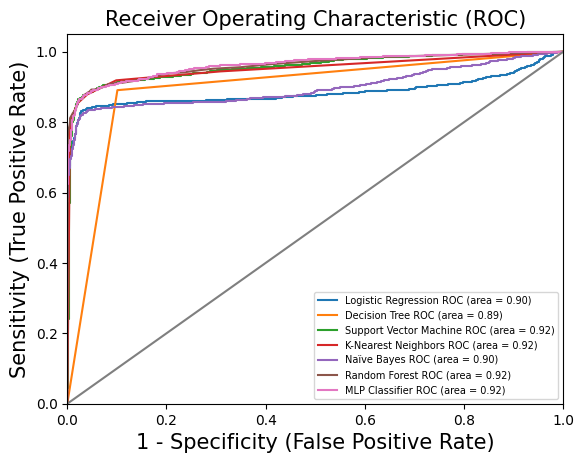

In [20]:
for m in models:
    model = m['model'] 
    model.fit(train_pca, target_train) 
    y_pred = model.predict(test_pca) 
    fpr, tpr, thresholds = roc_curve(target_test, model.predict_proba(test_pca)[:,1])
    auc_value = roc_auc_score(target_test, model.predict(test_pca))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc_value))
    
    label_text = '%s ROC (area = %0.2f)' % (m['label'], auc_value)
    
    print(label_text)
    

plt.plot([0, 1], [0, 1])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=7)
plt.show()
